In [ ]:
## before starting the project make sure that you have downloaded fsd1.mp4 files that you can find in the repository

In [1]:
!pip install torch torchvision torchaudio
!pip install opencv-python
!pip install matplotlib
!git clone https://github.com/ultralytics/yolov5.git
!cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 17067, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 17067 (delta 24), reused 27 (delta 12), pack-reused 17022 (from 1)
Receiving objects: 100% (17067/17067), 15.69 MiB | 16.58 MiB/s, done.
Resolving deltas: 100% (11718/11718), done.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'requirements.txt'


In [2]:
!curl -L "https://universe.roboflow.com/ds/nti2pv84mE?key=JaaIxy5baf" > roboflow.zip
!unzip roboflow.zip -d /content/dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   910  100   910    0     0   2009      0 --:--:-- --:--:-- --:--:--  2008
100  460M  100  460M    0     0  16.2M      0  0:00:28  0:00:28 --:--:-- 17.6M
Archive:  roboflow.zip
 extracting: /content/dataset/README.dataset.txt  
 extracting: /content/dataset/README.roboflow.txt  
 extracting: /content/dataset/data.yaml  
   creating: /content/dataset/test/
   creating: /content/dataset/test/images/
 extracting: /content/dataset/test/images/amz_00005_jpg.rf.929133a331751660ce441ecd6e7df290.jpg  
 extracting: /content/dataset/test/images/amz_00014_jpg.rf.07df77f72daf197119a816acba0e56ae.jpg  
 extracting: /content/dataset/test/images/amz_00024_jpg.rf.3797ca6c54b7d695ba121715bb621637.jpg  
 extracting: /content/dataset/test/images/amz_00059_jpg.rf.0f45c5c118e3bdb6334a744fb4490a8e.jpg  
 extracting: /content/dataset/test/images/amz

In [3]:
import yaml

with open('/content/dataset/data.yaml', 'r') as f:
    data = yaml.load(f, Loader=yaml.FullLoader)

data['train'] = '/content/dataset/train/images'
data['val'] = '/content/dataset/valid/images'

with open('/content/dataset/data.yaml', 'w') as f:
    yaml.dump(data, f)


In [4]:

%cd /content/yolov5

# Run the training command
!python train.py --img 640 --batch 16 --epochs 50 --data /content/dataset/data.yaml --weights yolov5s.pt --cache


Streaming output truncated to the last 5000 lines.
      14/49      4.07G    0.08203     0.0578    0.01476        435        640:  13% 9/67 [00:03<00:20,  2.79it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      14/49      4.07G    0.08222    0.05819    0.01511        486        640:  15% 10/67 [00:03<00:19,  3.00it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      14/49      4.07G    0.08194    0.05785      0.015        412        640:  16% 11/67 [00:03<00:19,  2.87it/s]/content/yolov5/train.py:412: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with torch.cuda.amp.autocast(amp):
      14/49      4.07G    0.08225    0

In [6]:
## here you should import the fsd1.mp4 thaht you downloaded locally
from google.colab import files
uploaded = files.upload()

Saving fsd1.mp4 to fsd1.mp4


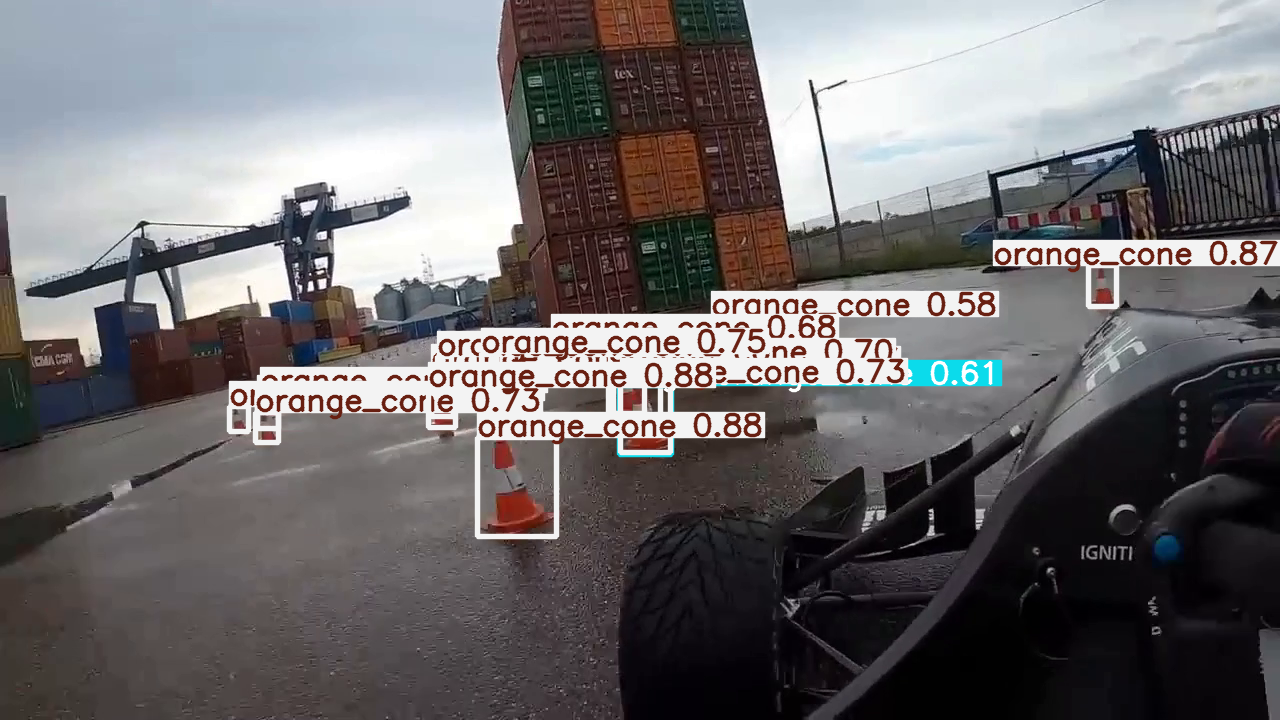

In [7]:
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import clear_output
import time
import torch

# Load the trained model
model_path = '/content/yolov5/runs/train/exp/weights/best.pt'  # Adjust the path as needed
model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)

# Path to the video file
video_path = 'fsd1.mp4'  # Adjust the path as needed

# Open the video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise IOError("Cannot open video")

# Define codec and create VideoWriter object to save output
out = cv2.VideoWriter('output.mp4', cv2.VideoWriter_fourcc(*'mp4v'), 20.0, (int(cap.get(3)), int(cap.get(4))))

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            break

        # Convert frame from BGR to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Inference
        results = model(frame_rgb)

        # Render results back onto the frame
        frame_result = results.render()[0]

        # Convert array to BGR for OpenCV
        frame_bgr = cv2.cvtColor(frame_result, cv2.COLOR_RGB2BGR)
        out.write(frame_bgr)  # Save to output file

        # Display the frame using cv2_imshow instead of cv2.imshow
        cv2_imshow(frame_bgr)
        time.sleep(0.1)  # Pause a bit for each frame to be visible, adjust as necessary

        # Clear output after each display to avoid flooding the output area
        clear_output(wait=True)

finally:
    # Release everything when job is finished
    cap.release()
    out.release()

In [8]:
from google.colab import files
files.download('output.mp4')  # Download the video file to your local system to check

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>